코랩에서는 노트설정 TPU로 설정

In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.7.0
Running on TPU  ['10.54.149.90:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.54.149.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.54.149.90:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


#gpu 사용

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# CNN

## 이미지 처리

In [ ]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### 이미지 확인

In [ ]:
y_train[0]

5

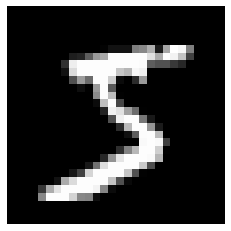

In [ ]:
plt.imshow( x_train[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

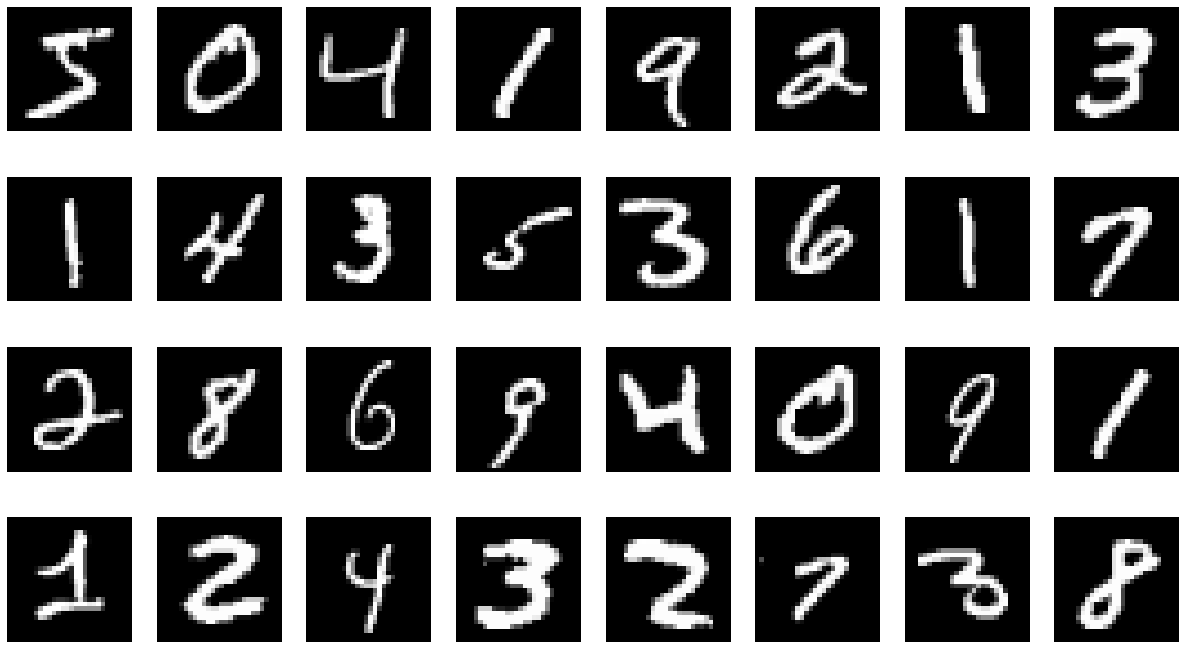

In [ ]:
plt.figure( figsize=(21, 12) )
for i in range(32):
  plt.subplot(4, 8, 1 + i)
  plt.imshow( x_train[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

- 0에서 9 사이의 숫자들의 손글씨를 이미지로 만든 것
- 분류 모형을 이용해 이 숫자들의 분류기를 만들 것임
- 케라스에서는 convolution을 layer로 취급함

### Convolution

In [ ]:
# edge detection
kernel1 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]], dtype=np.float64).reshape(3, 3, 1, 1)

# sharpen
kernel2 = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]], dtype=np.float64).reshape(3, 3, 1, 1)

# box blur
kernel3 = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1],], dtype=np.float64).reshape(3, 3, 1, 1) * 1/9

In [ ]:
@tf.function
def convolution( img, kernel ):
  return tf.nn.conv2d( img, kernel, strides=[1, 1, 1, 1], padding='VALID')

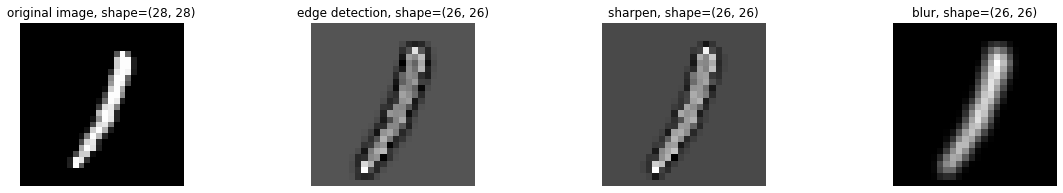

In [ ]:
img = tf.reshape( x_train[99], shape=[-1, 28, 28, 1] )
out1 = convolution( img, kernel1 )
out2 = convolution( img, kernel2 )
out3 = convolution( img, kernel3 )

plt.figure( figsize=(20, 3) )
plt.subplot( 1, 4, 1 )
plt.title(f'original image, shape={x_train[99].shape}')
plt.imshow( x_train[99], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 2 )
plt.title(f'edge detection, shape={out1[0, :, :, 0].shape}')
plt.imshow( out1[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 3 )
plt.title(f'sharpen, shape={out2[0, :, :, 0].shape}')
plt.imshow( out2[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 4 )
plt.title(f'blur, shape={out3[0, :, :, 0].shape}')
plt.imshow( out3[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()

#### strides
- 슬라이딩 윈도우를 하기 위한 값
 - 합성곱을 하기 위해 쭉 훑는 과정
- 슬라이딩 윈도우를 하기 위한 간격

#### padding
- 이미지 바깥 영역에 제로 패딩을 넣어서 슬라이딩 진행
- 엣지에 있는 값들을 살리기 위함
- SAME : 제로 패딩을 넣어서 feature 추출
- VALID : 제로 패딩을 넣지 않기 때문에 테두리 부분이 점점 희미해지면서 이미지 사이즈가 작아짐

### Pooling

In [ ]:
@tf.function
def pooling( img ):
  max_pool_2d = tf.keras.layers.MaxPool2D((2, 2))
  return max_pool_2d(img)

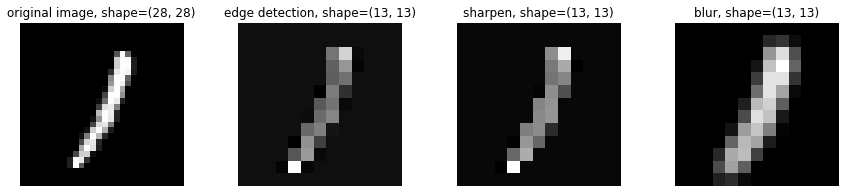

In [ ]:
ret1 = pooling( out1 )
ret2 = pooling( out2 )
ret3 = pooling( out3 )

plt.figure( figsize=(15, 3) )
plt.subplot( 1, 4, 1 )
plt.title(f'original image, shape={x_train[99].shape}')
plt.imshow( x_train[99], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 2 )
plt.title(f'edge detection, shape={ret1[0, :, :, 0].shape}')
plt.imshow( ret1[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 3 )
plt.title(f'sharpen, shape={ret2[0, :, :, 0].shape}')
plt.imshow( ret2[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 4 )
plt.title(f'blur, shape={ret3[0, :, :, 0].shape}')
plt.imshow( ret3[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()

#### strides
- 슬라이딩 윈도우를 하기 위한 값
 - 합성곱을 하기 위해 쭉 훑는 과정
- 슬라이딩 윈도우를 하기 위한 간격

#### padding
- 이미지 바깥 영역에 제로 패딩을 넣어서 슬라이딩 진행
- 엣지에 있는 값들을 살리기 위함
- SAME : 제로 패딩을 넣어서 feature 추출
- VALID : 제로 패딩을 넣지 않기 때문에 테두리 부분이 점점 희미해지면서 이미지 사이즈가 작아짐

### Pooling

In [ ]:
@tf.function
def pooling( img ):
  max_pool_2d = tf.keras.layers.MaxPool2D((2, 2))
  return max_pool_2d(img)

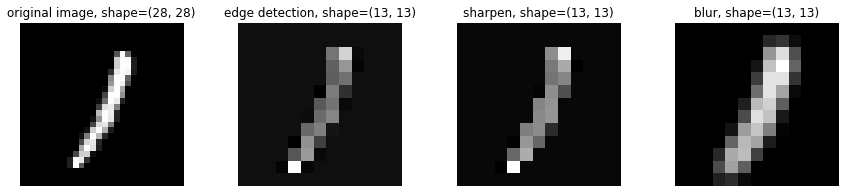

In [ ]:
ret1 = pooling( out1 )
ret2 = pooling( out2 )
ret3 = pooling( out3 )

plt.figure( figsize=(15, 3) )
plt.subplot( 1, 4, 1 )
plt.title(f'original image, shape={x_train[99].shape}')
plt.imshow( x_train[99], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 2 )
plt.title(f'edge detection, shape={ret1[0, :, :, 0].shape}')
plt.imshow( ret1[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 3 )
plt.title(f'sharpen, shape={ret2[0, :, :, 0].shape}')
plt.imshow( ret2[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot( 1, 4, 4 )
plt.title(f'blur, shape={ret3[0, :, :, 0].shape}')
plt.imshow( ret3[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()

## 이미지 넷 구축(mnist)
- convo1 * pooling 3번 진행해보기

In [ ]:
model = tf.keras.models.Sequential()

# Convolution Layer
model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
#pooling layer
model.add( tf.keras.layers.MaxPool2D((2,2)) )

# Convolution Layer
model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
#pooling layer
model.add( tf.keras.layers.MaxPool2D((2,2)) )

# Convolution Layer
model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
#pooling layer
model.add( tf.keras.layers.MaxPool2D((2,2)) )

# neural net의 입력으로 넣기 위해 1차원으로 변경하기
model.add(tf.keras.layers.Flatten())

# Neural net 구성하기
# hidden layer
model.add(tf.keras.layers.Dense(4096,activation='tanh'))
model.add(tf.keras.layers.Dense(4096,activation='tanh'))

# output layer
model.add(tf.keras.layers.Dense(10,activation='softmax')) # 분류모형의 마지막 activation는 항상 softmax

# optimization
model.compile(
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'],
  optimizer = 'Adam'
)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 9s 172ms/step - loss: 0.5448 - accuracy: 0.8229 - val_loss: 0.1701 - val_accuracy: 0.9482
Epoch 2/10
48/48 [==============================] - 8s 162ms/step - loss: 0.1340 - accuracy: 0.9581 - val_loss: 0.1081 - val_accuracy: 0.9666
Epoch 3/10
48/48 [==============================] - 8s 163ms/step - loss: 0.0957 - accuracy: 0.9707 - val_loss: 0.0872 - val_accuracy: 0.9729
Epoch 4/10
48/48 [==============================] - 8s 163ms/step - loss: 0.0793 - accuracy: 0.9756 - val_loss: 0.0796 - val_accuracy: 0.9764
Epoch 5/10
48/48 [==============================] - 8s 162ms/step - loss: 0.0646 - accuracy: 0.9794 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 6/10
48/48 [==============================] - 8s 161ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0835 - val_accuracy: 0.9747
Epoch 7/10
48/48 [==============================] - 8s 163ms/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.0844 - val_accuracy: 0.9773
Epoch 

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 학습 정확도

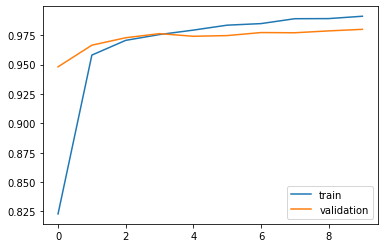

In [ ]:
plt.plot( hist.history['accuracy'], label='train')
plt.plot( hist.history['val_accuracy'], label='validation') # 검증정확도(테스트 사용)
plt.legend()
plt.show()

### 손실함수

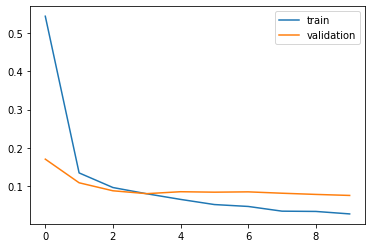

In [ ]:
plt.plot( hist.history['loss'], label='train')
plt.plot( hist.history['val_loss'], label='validation') # 검증정확도
plt.legend()
plt.show()

### 예측
- 학습에 사용 안된 test set을 이용

In [ ]:
print(y_test[1000])

9


In [ ]:
yhat=model.predict(x_test)

In [ ]:
print(yhat[1000]) # 99%의 확률로 9로 예측
print(np.argmax(yhat[1000]))

[3.9854192e-12 3.6871558e-08 1.3730606e-10 5.2169369e-05 4.2581058e-07
 6.2328759e-08 1.3194339e-15 8.1363924e-06 4.1494310e-09 9.9993920e-01]
9


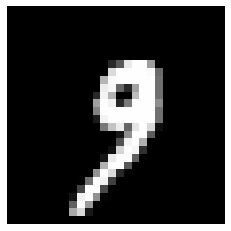

In [ ]:
plt.imshow( x_test[1000], cmap='gray')
plt.axis('off')
plt.show()

# 강아지 고양이

In [ ]:
kaggle_path='/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/kaggle.json'

! mkdir -p ~/.kaggle
! cp '{kaggle_path}' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog'

! kaggle competitions download -c dogs-vs-cats

/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog
 99% 268M/271M [00:02<00:00, 85.3MB/s]
100% 271M/271M [00:03<00:00, 94.1MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 12.0MB/s]
 98% 530M/543M [00:04<00:00, 138MB/s]
100% 543M/543M [00:04<00:00, 130MB/s]


In [ ]:
train_path = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog/train.zip'
test_path = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog/test1.zip'

! unzip '{train_path}' 
! unzip '{test_path}' 

일부 데이터

In [4]:
import os, shutil

In [ ]:
# 원본 데이터셋의 경로
original_dataset_path = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog/train'

# 소규모 데이터를 위한 폴더
base_dir = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog_small/'
# 해당 셀을 반복적으로 실행을 하면 에러가 발생(방지)
# 기존에 해당 폴더가 이미 존재하면 삭제후 새로 생성
if os.path.exists(base_dir):
  shutil.rmtree(base_dir) # 기존에 폴더가 존재할 경우 삭제
os.mkdir(base_dir)

# 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 해당 경로에 폴더를 생성
os.mkdir(train_path)
os.mkdir(val_path)
os.mkdir(test_path)

# 훈련용 고양이 사진을 위한 폴더
train_cat_path = os.path.join(train_path, 'cats')
os.mkdir( train_cat_path)

# 훈련용 강아지 사진을 위한 폴더
train_dog_path = os.path.join(train_path, 'dogs')
os.mkdir( train_dog_path)

# 검증용 고양이 사진을 위한 폴더
val_cat_path = os.path.join(val_path, 'cats')
os.mkdir( val_cat_path)

# 검증용 강아지 사진을 위한 폴더
val_dog_path = os.path.join(val_path, 'dogs')
os.mkdir( val_dog_path)

# 테스트용 고양이 사진을 위한 폴더
test_cat_path = os.path.join(test_path, 'cats')
os.mkdir( test_cat_path)

# 테스트용 강아지 사진을 위한 폴더
test_dog_path = os.path.join(test_path, 'dogs')
os.mkdir( test_dog_path)

# 책에서는 전체 이미지에서 10%에 해당하는 1000개의 이미지를 훈련용으로 사용
# 검증용과, 테스트용은 각각 500개씩 사용

# 학습용 이미지 복사
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) # 원본 파일 경로
  dst_path = os.path.join(train_cat_path, fname)        # 복사할 파일 경로
  shutil.copyfile( src_path, dst_path )

fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(train_dog_path, fname)        
  shutil.copyfile( src_path, dst_path )

# 검증용 이미지 복사
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(val_cat_path, fname)        
  shutil.copyfile( src_path, dst_path )

fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(val_dog_path, fname)        
  shutil.copyfile( src_path, dst_path )

# 테스트용 이미지 복사
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(test_cat_path, fname)        
  shutil.copyfile( src_path, dst_path )

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(test_dog_path, fname)        
  shutil.copyfile( src_path, dst_path )

## 데이터 전처리
1. 이미지가 모두 동일한 크기
2. 스케일링
- 픽셀 값을 0~255 사이의 값으로 설정

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 데이터의 경로
base_dir = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 모든 이미지의 픽셀값을 스케일링
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
  val_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 네트워크 구성

In [ ]:
model = tf.keras.models.Sequential()

# Convolution Layer
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # 컬러(rgb)이므로 3차원
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

# feature map -> input
model.add( tf.keras.layers.Flatten() )

# Neural Network
model.add( tf.keras.layers.Dense(512, activation='relu') ) # hidden layer
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )# output layer

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

### 학습

In [ ]:
hist = model.fit_generator(
  train_generator,
  steps_per_epoch = 100,
  epochs = 30,
  validation_data = val_generator,
  validation_steps= 50
)

Epoch 1/30
100/100 [==============================] - 24s 136ms/step - loss: 0.6847 - acc: 0.5475 - val_loss: 0.6635 - val_acc: 0.5900
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6577 - acc: 0.6160 - val_loss: 0.6458 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6139 - acc: 0.6610 - val_loss: 0.6099 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5691 - acc: 0.6980 - val_loss: 0.6039 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5385 - acc: 0.7265 - val_loss: 0.6315 - val_acc: 0.6290
Epoch 6/30
100/100 [==============================] - 14s 136ms/step - loss: 0.5121 - acc: 0.7495 - val_loss: 0.5769 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 13s 134ms/step - loss: 0.4920 - acc: 0.7540 - val_loss: 0.5636 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### loss

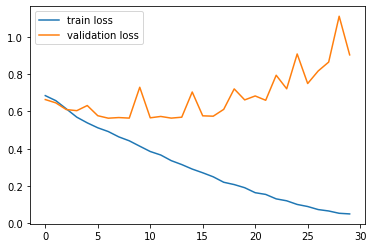

In [ ]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

- 데이터값이 너무 작아서 **과적합**이 일어나는 중
- 학습자료가 아닌 경우(validation)에는 손실값이 증가

### accuracy

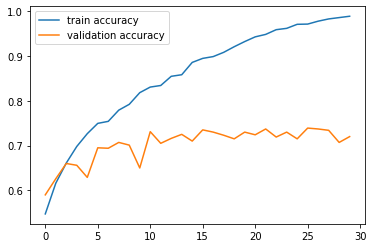

In [ ]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

- 학습자료 외에는 정확도가 올라가지 않음

## 과적합 줄이는 방법
- 자료의 수 늘리기 -> 이건 현실적으로 힘듦
- 다중공산성 줄이기
- 변수 선택법 (변수 줄이기)
- 정규화(L1, L2)
 - dropout

### 데이터 증식
- 여러가지 형태로 데이터를 만들어 냄

In [ ]:
from keras.preprocessing import image

In [ ]:
# 모든 파일 목록 가져오기
fnames = [ os.path.join(train_cat_path, fname) for fname in os.listdir(train_cat_path) ]
print(fnames)

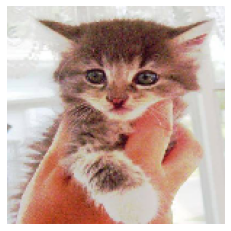

In [ ]:
# 이미지 읽고 크기를 150 * 150으로 설정
img_path = fnames[100]
img = image.load_img( img_path, target_size=(150, 150) )
# 원본 이미지
plt.imshow(img)
plt.axis('off')
plt.show()

선택된 이미지를 변환 시켜서 다양한 형태 생성

In [ ]:
dataGen = ImageDataGenerator(
  rotation_range = 40,
  width_shift_range= 0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode = 'nearest'
)

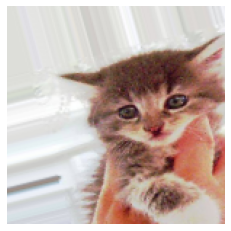

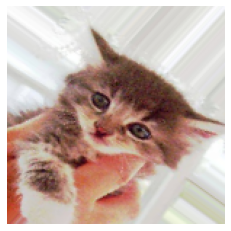

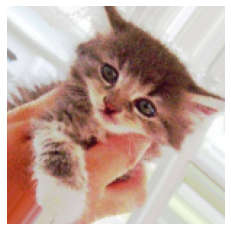

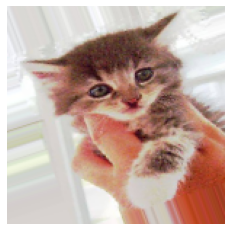

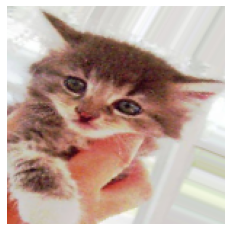

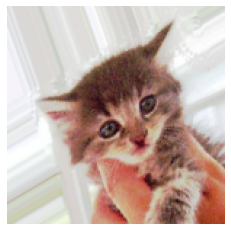

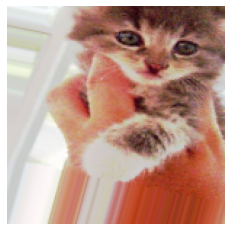

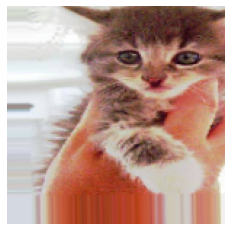

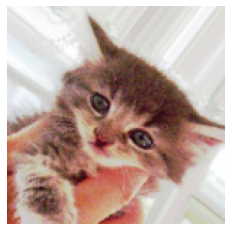

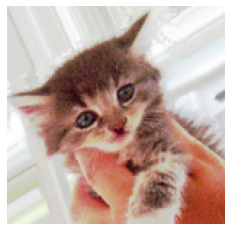

In [ ]:
# 150 x 150 x 3 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# 1 x 150 x 150 x 3 크기로 변환
x = x.reshape((1,) + x.shape)

i = 0
for batch in dataGen.flow(x, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  plt.axis('off')
  i += 1
  if i % 10 == 0: break
plt.show()

증식된 학습 이미지

In [ ]:
base_dir = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 학습 이미지를 생성
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 40,
  width_shift_range= 0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)

# 검증 이미지는 증식하지 않습니다.
# 검증 데이터는 학습 과정에서 절대로 사용되어선 안됩니다.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
  val_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 네트워크 구성

In [ ]:
model = tf.keras.models.Sequential()

# Convolution Layer
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

# feature map -> input
model.add( tf.keras.layers.Flatten() )

# DropOut Layer
model.add( tf.keras.layers.Dropout(0.5))

# Neural Network
model.add( tf.keras.layers.Dense(512, activation='relu') ) # hidden layer
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )# output layer

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [ ]:
hist = model.fit_generator(
  train_generator,
  steps_per_epoch = 100,
  epochs = 100,
  validation_data = val_generator,
  validation_steps= 50
)

Epoch 1/100
100/100 [==============================] - 23s 228ms/step - loss: 0.6920 - acc: 0.5205 - val_loss: 0.6811 - val_acc: 0.5340
Epoch 2/100
100/100 [==============================] - 23s 228ms/step - loss: 0.6855 - acc: 0.5505 - val_loss: 0.7136 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6737 - acc: 0.5800 - val_loss: 0.6558 - val_acc: 0.5970
Epoch 4/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6624 - acc: 0.5950 - val_loss: 0.6347 - val_acc: 0.6260
Epoch 5/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6500 - acc: 0.6145 - val_loss: 0.6211 - val_acc: 0.6430
Epoch 6/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6461 - acc: 0.6155 - val_loss: 0.6122 - val_acc: 0.6510
Epoch 7/100
100/100 [==============================] - 22s 225ms/step - loss: 0.6318 - acc: 0.6315 - val_loss: 0.6112 - val_acc: 0.6740
Epoch 8/100
100/100 [===========================

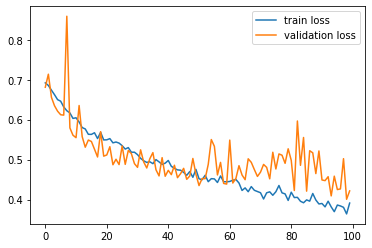

In [ ]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

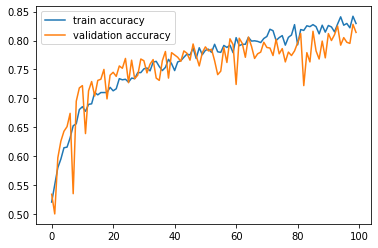

In [ ]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

## 전이학습
- 사전에 있는 convolution 사용

In [ ]:
# 사전 훈련된 모델을 기반으로 해서 기본 모델을 생성
base_model = tf.keras.applications.VGG16(
  weights='imagenet',       # 모델 초기화를 위한 가중치 체크포인트
  include_top=False,        # neural net 분류기를 포함할지 안할지
  input_shape=(150, 150, 3) # 네트워크에 들어갈 입력의 모양. 텐서플로우 크기
)

58900480/58889256 [==============================] - 0s 0us/step


### VGG16

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

- 최종적으로 150 X 150 X 3 이미지를  4 X 4 X 512 특징 맵으로 변환시킴

#### 1 데이터 증식 사용 x

In [ ]:
base_dir = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features( dir, sample_count ):
  features = np.zeros( shape=(sample_count, 4, 4, 512) )
  labels = np.zeros( shape=(sample_count)) 
  generator = datagen.flow_from_directory(
    dir,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary'
  )
  i = 0
  for input_batch, labels_batch in generator:
    features_batch = base_model.predict( input_batch )
    features[i * batch_size : (i + 1) * batch_size ] = features_batch
    labels[i * batch_size : (i + 1) * batch_size ] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      # 제너레이터는 무한히 값을 생성하기 때문에, 모든 이미지를 한 번씩 처리하고 나면 종료
      break
  return features, labels

In [ ]:
train_features, train_labels = extract_features( train_path, 2000 )
val_features, val_labels = extract_features( val_path, 1000 )
test_features, test_labels = extract_features( test_path, 1000 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- 사전에 훈련된 모델을 통해서 특징만 따로 뽑아오는 것임
- 데이터 셋이 적어도 상관 x
- 단점은 이 특징들이 정말 강아지 고양이와 관련이 있는지에 대한 것은 모르는 일 ㅋ

추출된 특성은 NN에 입력하기 위해 1차원 형태로 변환

In [ ]:
train_features = np.reshape( train_features, (2000, 4 * 4 * 512))
val_features = np.reshape( val_features, (1000, 4 * 4 * 512))
test_features = np.reshape( test_features, (1000, 4 * 4 * 512))

##### 네트워크 정의

In [ ]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512 ) ) 
model.add( tf.keras.layers.Dropout(0.5) )
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [ ]:
hist = model.fit( 
  train_features, train_labels, epochs=30, batch_size = 20, 
  validation_data = (val_features, val_labels)
)

Epoch 1/30
100/100 [==============================] - 2s 9ms/step - loss: 0.4642 - acc: 0.7685 - val_loss: 0.3278 - val_acc: 0.8480
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2897 - acc: 0.8800 - val_loss: 0.2729 - val_acc: 0.8850
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2375 - acc: 0.9005 - val_loss: 0.2593 - val_acc: 0.9020
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2092 - acc: 0.9145 - val_loss: 0.2539 - val_acc: 0.8950
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1817 - acc: 0.9265 - val_loss: 0.2437 - val_acc: 0.9020
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1528 - acc: 0.9410 - val_loss: 0.2454 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1387 - acc: 0.9470 - val_loss: 0.2550 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

##### loss

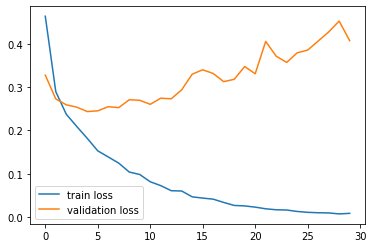

In [ ]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

- 과적합 존재
- 데이터 증식이 불가능하기 때문에 그럴 것이라고 예상됨

##### accuracy

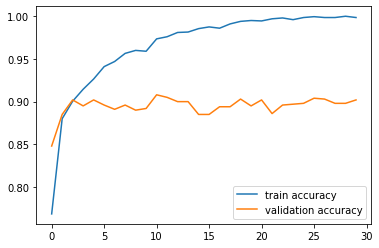

In [ ]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

#### 2 데이터 증식 사용

베이스 모델

In [5]:
# 사전 훈련된 모델을 기반으로 해서 기본 모델을 생성
base_model = tf.keras.applications.VGG16(
  weights='imagenet',       # 모델 초기화를 위한 가중치 체크포인트
  include_top=False,        # neural net 분류기를 포함할지 안할지
  input_shape=(150, 150, 3) # 네트워크에 들어갈 입력의 모양. 텐서플로우 크기
)

- 가져온 베이스 모델에 뉴럴 네트워크 추가
- 베이스 모델에는 convolution layer만 존재하는 상태

In [6]:
model = tf.keras.models.Sequential()

# 사전 학습된 합성곱 기반층을 새로운 모델에 추가
model.add( base_model )

# 분류기(Classifier)를 추가
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense( 256, activation='relu'))
model.add( tf.keras.layers.Dense( 1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


##### 합성곱 기반층 동결
- 변경 사항이 저장되게끔 함

In [8]:
# 데이터 가중치들 업데이트 되지 않도록 동결
base_model.trainable = False

새로운 모델

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
base_dir = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 학습 이미지를 생성
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 40,
  width_shift_range= 0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)

# 검증 이미지는 증식하지 않습니다.
# 검증 데이터는 학습 과정에서 절대로 사용되어선 안됩니다.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
  val_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


optimize 모델

In [11]:
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.00002)
)

학습

In [12]:
hist = model.fit_generator(
  train_generator, 
  steps_per_epoch=100,
  epochs = 30,
  validation_data = val_generator,
  validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 674s 7s/step - loss: 0.6040 - acc: 0.6755 - val_loss: 0.4513 - val_acc: 0.8310
Epoch 2/30
100/100 [==============================] - 24s 243ms/step - loss: 0.4770 - acc: 0.7815 - val_loss: 0.3656 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 24s 241ms/step - loss: 0.4332 - acc: 0.8065 - val_loss: 0.3438 - val_acc: 0.8550
Epoch 4/30
100/100 [==============================] - 24s 243ms/step - loss: 0.4173 - acc: 0.8080 - val_loss: 0.3133 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 24s 241ms/step - loss: 0.3879 - acc: 0.8310 - val_loss: 0.3063 - val_acc: 0.8680
Epoch 6/30
100/100 [==============================] - 24s 242ms/step - loss: 0.3684 - acc: 0.8395 - val_loss: 0.2901 - val_acc: 0.8790
Epoch 7/30
100/100 [==============================] - 24s 242ms/step - loss: 0.3729 - acc: 0.8345 - val_loss: 0.2812 - val_acc: 0.8810
Epoch 8/30
100/100 [==============================] - 24s

##### loss

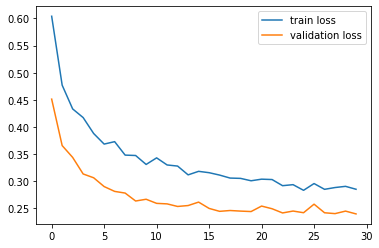

In [13]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

##### accuracy

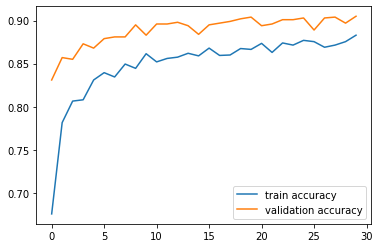

In [14]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

#### 미세조정
- 사전에 학습된 합성곱 기반층에서 일부 계층(상위계층)만 가중치 계산

In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [16]:
for layer in base_model.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


일부 계층만 가중치 계산 (나머진 동결)

In [17]:
# 동결 풀기
base_model.trainable= True

In [18]:
set_trainable=False
for layer in base_model.layers:
  if 'block5_conv' in layer.name:
    set_trainable = True
  if set_trainable: layer.trainable = True
  else : layer.trainable = False

In [19]:
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.00001)
)

In [20]:
hist = model.fit_generator(
  train_generator, 
  steps_per_epoch=100,
  epochs = 30,
  validation_data = val_generator,
  validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 28s 269ms/step - loss: 0.2887 - acc: 0.8700 - val_loss: 0.2530 - val_acc: 0.8960
Epoch 2/30
100/100 [==============================] - 25s 247ms/step - loss: 0.2645 - acc: 0.8850 - val_loss: 0.2079 - val_acc: 0.9170
Epoch 3/30
100/100 [==============================] - 25s 246ms/step - loss: 0.2383 - acc: 0.8960 - val_loss: 0.2071 - val_acc: 0.9190
Epoch 4/30
100/100 [==============================] - 25s 250ms/step - loss: 0.2169 - acc: 0.9180 - val_loss: 0.1979 - val_acc: 0.9160
Epoch 5/30
100/100 [==============================] - 25s 248ms/step - loss: 0.1974 - acc: 0.9160 - val_loss: 0.1929 - val_acc: 0.9210
Epoch 6/30
100/100 [==============================] - 25s 248ms/step - loss: 0.1978 - acc: 0.9140 - val_loss: 0.1897 - val_acc: 0.9240
Epoch 7/30
100/100 [==============================] - 25s 247ms/step - loss: 0.1968 - acc: 0.9240 - val_loss: 0.2129 - val_acc: 0.9230
Epoch 8/30
100/100 [==============================] - 2

##### loss

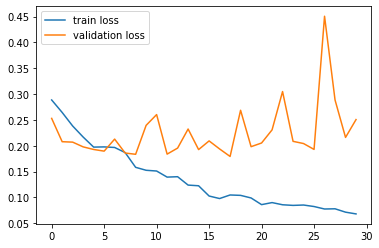

In [21]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

##### accuracy

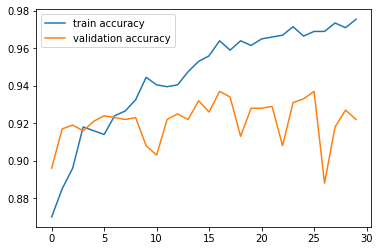

In [22]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

- 정확도는 올라갔지만 손실은 오히려 올라간 것 같음. 과적합 발생

## 모형 평가
- test set 이용해서 마지막에 만든 *미세조정* 모델의 정확도 평가해보기
- 학습에 사용되지 않은 test set 사용해야 함

In [24]:
# test 셋에 대한 제너레이터 생성
base_dir = '/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 평가용은 데이터를 증식하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  test_path,
  target_size = (150, 150),
  batch_size = 20,
  class_mode = 'binary'
)

test_loss, test_acc = model.evaluate_generator( test_generator, steps=50 )
print(f'test loss: {test_loss}, test accuracy: {test_acc}')

Found 1000 images belonging to 2 classes.
test loss: 0.3096930682659149, test accuracy: 0.9160000085830688


- 꽤 높은 정확도
- 전체 데이터셋을 다 사용하지 않고 대략 2000여개 데이터를 훈련한 결과가 의미가 있음
- 전이학습, 데이터 증식과 같은 방법은 적은 데이터 셋을 사용해도 효과적임

In [25]:
model.save('final_model.h5')

In [27]:
load_model = tf.keras.models.load_model('final_model.h5')

In [28]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________
